In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

pi, exp, sin, cos = np.pi, np.exp, np.sin, np.cos

plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm", "font.size": 8})
plt.style.use("dark_background")

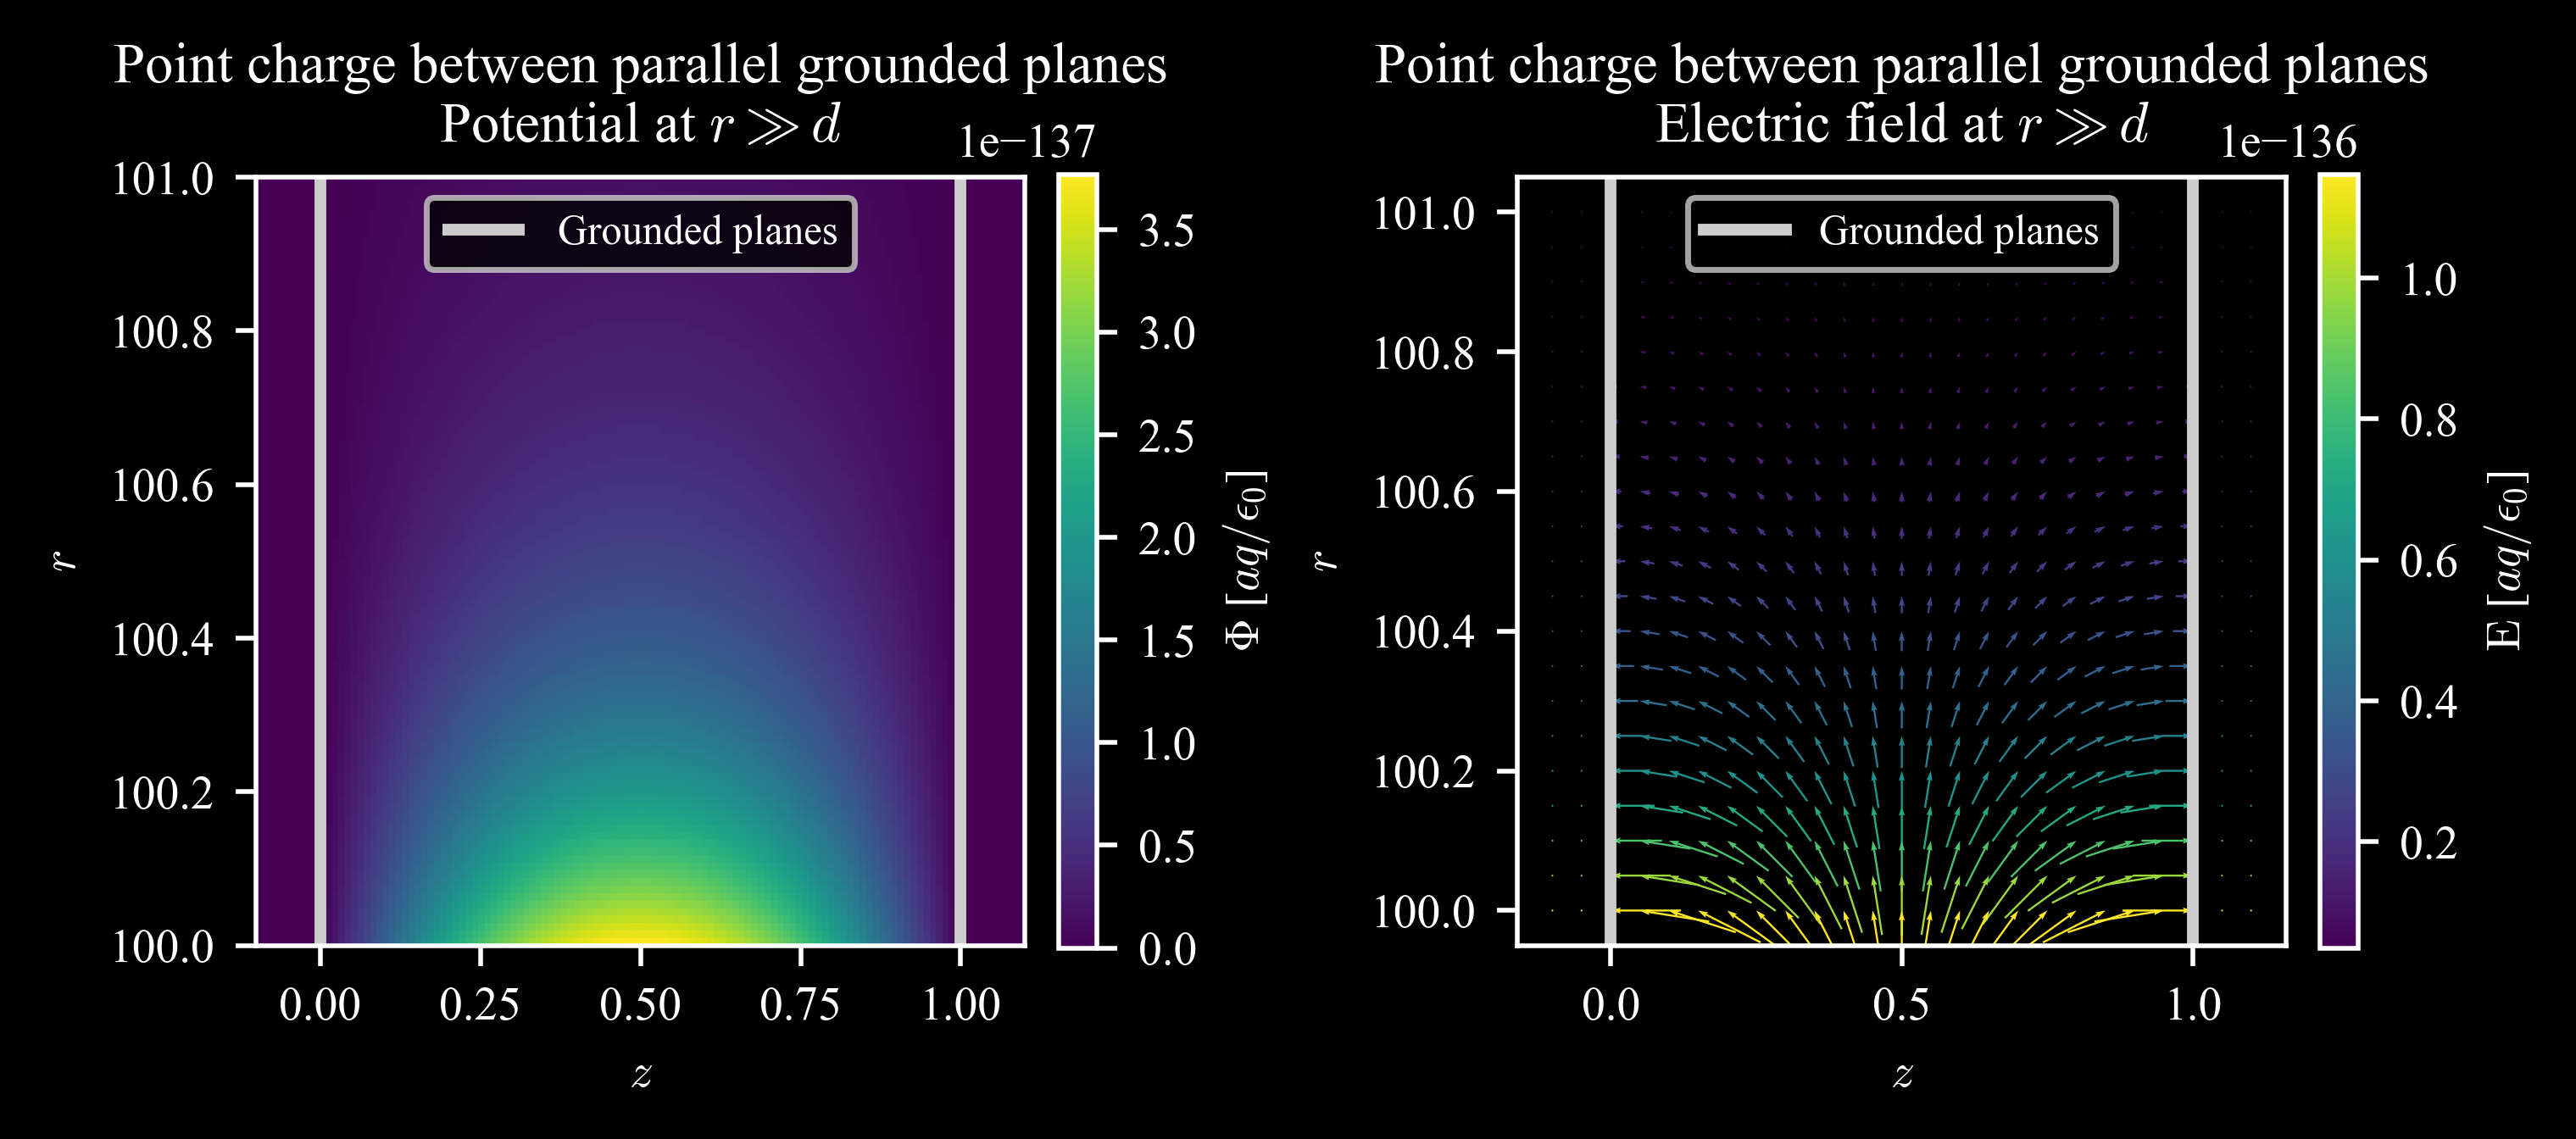

In [6]:
# aq / ε_0 = 1, d = 1
@np.vectorize
def phi(r, z):
    return exp(-pi*r) * sin(pi*z)

def E(r, z):
    return -pi*exp(-pi*r) * cos(pi * z), pi*exp(-pi*r) * sin(pi * z)

step = 0.01
minz, maxz = -0.1, 1.1
minR, maxR = 100, 101
R, Z = np.mgrid[maxR:(minR-step):-step, minz:maxz:step]

# Potential
phi = phi(R, Z)
phi[Z < 0], phi[Z > 1] = 0, 0
fig, axs = plt.subplot_mosaic([["phi", "E"]], dpi=500)

im = axs["phi"].imshow(phi, extent=[minz, maxz, minR, maxR])
fig.colorbar(im, label="$\\Phi$ [$aq/\\epsilon_0$]", fraction=0.046, pad=0.04)
axs["phi"].set(title="Point charge between parallel grounded planes\nPotential at $r \\gg d$", xlabel="$z$", ylabel="$r$")
axs["phi"].vlines((0, 1), 100, 101, color="#ccc", lw=2, label="Grounded planes")
axs["phi"].set_aspect(1.0/axs["phi"].get_data_ratio(), adjustable='box')
axs["phi"].legend(fontsize=7, loc='upper center')

# Field
step = 0.05
minz, maxz = -0.1, 1.1
minR, maxR = 100, 101
R, Z = np.mgrid[maxR:(minR-step):-step, minz:maxz:step]
Ez, Er = E(R, Z)
E = np.sqrt(Ez**2 + Er**2)
Er[Z < 0], Er[Z > 1], Ez[Z < 0], Ez[Z > 1] = 0, 0, 0, 0
im = axs["E"].quiver(Z, R, Ez, Er, E, pivot='tip')
axs["E"].axvline(0, color="#ccc", lw=2, label="Grounded planes")
axs["E"].axvline(1, color="#ccc", lw=2)
axs["E"].set(title="Point charge between parallel grounded planes\nElectric field at $r \\gg d$", xlabel="$z$", ylabel="$r$")
axs["E"].set_aspect(1.0/axs["E"].get_data_ratio(), adjustable='box')
axs["E"].legend(fontsize=7, loc='upper center')
fig.colorbar(im, label="$\\mathrm{E}$ [$aq/\\epsilon_0$]", fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.savefig("parallel_planes.png")
plt.show()